# **Logistic Regression**

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

For each record in the dataset it is provided: 

    - Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
    - Triaxial Angular velocity from the gyroscope.
    - A 561-feature vector with time and frequency domain variables.
    - Its activity label

In [60]:
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_palette('dark')


**we will get error if we simply write sep=',' so used two methods one is sep='delimiter' and the other is on_bad_lines='skip'**

In [ ]:
pd.read_csv("Human_Activity_Recognition_Using_Smartphones_Data.csv",sep='delimiter')

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


"tBodyAcc-mean()-X","tBodyAcc-mean()-Y","tBodyAcc-mean()-Z","tBodyAcc-std()-X","tBodyAcc-std()-Y","tBodyAcc-std()-Z","tBodyAcc-mad()-X","tBodyAcc-mad()-Y","tBodyAcc-mad()-Z","tBodyAcc-max()-X","tBodyAcc-max()-Y","tBodyAcc-max()-Z","tBodyAcc-min()-X","tBodyAcc-min()-Y","tBodyAcc-min()-Z","tBodyAcc-sma()","tBodyAcc-energy()-X","tBodyAcc-energy()-Y","tBodyAcc-energy()-Z","tBodyAcc-iqr()-X","tBodyAcc-iqr()-Y","tBodyAcc-iqr()-Z","tBodyAcc-entropy()-X","tBodyAcc-entropy()-Y","tBodyAcc-entropy()-Z","tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z","tGravityAcc-mean()-X","tGravityAcc-mean()-Y","tGravityAcc-mean()-Z","tGravityAcc-std()-X","tGravityAcc-std()-Y","tGravityAcc-std()-Z","tGravityAcc-mad()-X","tGravityAcc-mad()-Y","tGravityAcc-mad()-Z","tGravityAcc-max()-X","tGravityAcc-max()-Y","tGravityAcc-max()-Z","tGravityAcc-min()-X","tGravityAcc-min()-Y","tGravityAcc-min()-Z","tGravityAcc-sma()","tGravityAcc-energy()-X","tGravityAcc-energy()-Y","tGravityAcc-energy()-Z","tGravityAcc-iqr()-X","tGravityAcc-iqr()-Y","tGravityAcc-iqr()-Z","tGravityAcc-entropy()-X","tGravityAcc-entropy()-Y","tGravityAcc-entropy()-Z","tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z","tBodyAccJerk-mean()-X","tBodyAccJerk-mean()-Y","tBodyAccJerk-mean()-Z","tBodyAccJerk-std()-X","tBodyAccJerk-std()-Y","tBodyAccJerk-std()-Z","tBodyAccJerk-mad()-X","tBodyAccJerk-mad()-Y","tBodyAccJerk-mad()-Z","tBodyAccJerk-max()-X","tBodyAccJerk-max()-Y","tBodyAccJerk-max()-Z","tBodyAccJerk-min()-X","tBodyAccJerk-min()-Y","tBodyAccJerk-min()-Z","tBodyAccJerk-sma()","tBodyAccJerk-energy()-X","tBodyAccJerk-energy()-Y","tBodyAccJerk-energy()-Z","tBodyAccJerk-iqr()-X","tBodyAccJerk-iqr()-Y","tBodyAccJerk-iqr()-Z","tBodyAccJerk-entropy()-X","tBodyAccJerk-entropy()-Y","tBodyAccJerk-entropy()-Z","tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z","tBodyGyro-mean()-X","tBodyGyro-mean()-Y","tBodyGyro-mean()-Z","tBodyGyro-std()-X","tBodyGyro-std()-Y","tBodyGyro-std()-Z","tBodyGyro-mad()-X","tBodyGyro-mad()-Y","tBodyGyro-mad()-Z","tBodyGyro-max()-X","tBodyGyro-max()-Y","tBodyGyro-max()-Z","tBodyGyro-min()-X","tBodyGyro-min()-Y","tBodyGyro-min()-Z","tBodyGyro-sma()","tBodyGyro-energy()-X","tBodyGyro-energy()-Y","tBodyGyro-energy()-Z","tBodyGyro-iqr()-X","tBodyGyro-iqr()-Y","tBodyGyro-iqr()-Z","tBodyGyro-entropy()-X","tBodyGyro-entropy()-Y","tBodyGyro-entropy()-Z","tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z","tBodyGyroJerk-mean()-X","tBodyGyroJerk-mean()-Y","tBodyGyroJerk-mean()-Z","tBodyGyroJerk-std()-X","tBodyGyroJerk-std()-Y","tBodyGyroJerk-std()-

In [ ]:
data=pd.read_csv("Human_Activity_Recognition_Using_Smartphones_Data.csv",sep='delimiter')

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
data.dtypes

"tBodyAcc-mean()-X","tBodyAcc-mean()-Y","tBodyAcc-mean()-Z","tBodyAcc-std()-X","tBodyAcc-std()-Y","tBodyAcc-std()-Z","tBodyAcc-mad()-X","tBodyAcc-mad()-Y","tBodyAcc-mad()-Z","tBodyAcc-max()-X","tBodyAcc-max()-Y","tBodyAcc-max()-Z","tBodyAcc-min()-X","tBodyAcc-min()-Y","tBodyAcc-min()-Z","tBodyAcc-sma()","tBodyAcc-energy()-X","tBodyAcc-energy()-Y","tBodyAcc-energy()-Z","tBodyAcc-iqr()-X","tBodyAcc-iqr()-Y","tBodyAcc-iqr()-Z","tBodyAcc-entropy()-X","tBodyAcc-entropy()-Y","tBodyAcc-entropy()-Z","tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z","tGravityAcc-mean()-X","tGravityAcc-mean()-Y","tGravityAcc-mean()-Z","tGravityAcc-std()-X","tGravityAcc-std()-Y","tG

In [ ]:
data.dtypes.value_counts()

object    1
dtype: int64

In [ ]:
pd.read_csv('Human_Activity_Recognition_Using_Smartphones_Data.csv', on_bad_lines='skip')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (548) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.991364,-1.000000,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.99045792,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.991134,-1.000000,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.99454373,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.986658,-1.000000,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274

In [ ]:
data=pd.read_csv('Human_Activity_Recognition_Using_Smartphones_Data.csv', on_bad_lines='skip')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (548) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
Length: 562, dtype: object

In [ ]:
data.dtypes.value_counts()

float64    560
object       2
dtype: int64

**it shows 2 objects but there is only one object column which shows like walking, walking upstairs, walking downstairs, sitting, standing, and laying**
❓

**I think there has been problem in downloading the csv file so now it has been reseted**

In [84]:
pd.read_csv('Human_Activity_Recognition_Using_Smartphones_Data.csv',sep=',')

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.991364,-1.000000,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.991134,-1.000000,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.986658,-1.000000,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.

In [85]:
data=pd.read_csv('Human_Activity_Recognition_Using_Smartphones_Data.csv',sep=',')

In [86]:
data.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
Length: 562, dtype: object

In [87]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

**we know to see first 5 values we use data.head() what if we want to see last 5 values**

In [88]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

And we can see that here as we look at the data.dtypes and look at the last five values and we see that activity is going to be that one object, column.

**We're then going to see that the data is scaled from a minimum of negative one to a maximum of one. So there's some type of scaling here and the way that we're going to prove it is that for every single value, we're going to see that all of the minimums are negative one and all of the maximums are positive one.**

In [89]:
data.iloc[:,:-1].min()

tBodyAcc-mean()-X                      -1.0
tBodyAcc-mean()-Y                      -1.0
tBodyAcc-mean()-Z                      -1.0
tBodyAcc-std()-X                       -1.0
tBodyAcc-std()-Y                       -1.0
                                       ... 
angle(tBodyGyroMean,gravityMean)       -1.0
angle(tBodyGyroJerkMean,gravityMean)   -1.0
angle(X,gravityMean)                   -1.0
angle(Y,gravityMean)                   -1.0
angle(Z,gravityMean)                   -1.0
Length: 561, dtype: float64

In [90]:
data.iloc[:,:-1].min().value_counts()

-1.0    561
dtype: int64

In [91]:
data.iloc[:,:-1].max()

tBodyAcc-mean()-X                       1.0
tBodyAcc-mean()-Y                       1.0
tBodyAcc-mean()-Z                       1.0
tBodyAcc-std()-X                        1.0
tBodyAcc-std()-Y                        1.0
                                       ... 
angle(tBodyGyroMean,gravityMean)        1.0
angle(tBodyGyroJerkMean,gravityMean)    1.0
angle(X,gravityMean)                    1.0
angle(Y,gravityMean)                    1.0
angle(Z,gravityMean)                    1.0
Length: 561, dtype: float64

In [92]:
data.iloc[:,:-1].max().value_counts()

1.0    561
dtype: int64

**Next thing we want to do is look at the breakdown of each one of the activities. And we see here that our outcome variable has a fairly balanced set. So we see that they each take up an equal proportion of the overall rows**

That different types of error metrics are going to work better for different types of datasets, whether they're balanced or unbalanced. So here we're working with a balanced data set. So we want to start thinking what is the best type of error metric to use given that we have a more balanced data set compared to our leukemia example that we talked about in lecture that was very unbalanced with 99% being healthy and only 1% being unhealthy.

In [93]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

**Then as we mentioned, we cannot pass in a string into our sklearn, learned model, whatever it is here going to be logistic regression. So we have to encode that as an integer. So we're going to create our LabelEncoder object.**

In [94]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Activity']=le.fit_transform(data.Activity)

In [95]:
data['Activity'].sample(5)

6978    2
3795    2
757     0
1140    5
6525    0
Name: Activity, dtype: int64

now our activity column has been changed to as we see here from the sample integers ranging from 0 to 5 for each one of our different categories, right? Those six different categories we had before are now not the value 0, 1, 2, 3, 4, 5.

In [96]:
data['Activity']

0        2
1        2
2        2
3        2
4        2
        ..
10294    5
10295    5
10296    5
10297    5
10298    5
Name: Activity, Length: 10299, dtype: int64

**we want to calculate the correlations between the independent variables. We want to then create a histogram of the different correlation values and then we're going to want to identify those that are most correlated whether it's positive or negative with one another.**

In [97]:
feature_cols=data.columns[:-1]
corr_values=data[feature_cols].corr()

So that's going to be data.columns, and then all them up until the last. And then in order to get our correlation matrix, all we have to do is specify those other columns that we want our feature columns and call the core. And that's just going to output a panda's data frame that's just a correlation matrix

In [98]:
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,-0.007160,-0.063463,0.075945,0.014040,-0.008399,-0.022104,0.022322,-0.027758,-0.071459,0.025111,-0.019118,-0.045154,0.142928,0.005005,-0.076582,0.019124,0.011382,-0.035169,0.046855,0.025448,0.010860,-0.042980,0.057837,0.026440,0.020344,-0.029332,0.009007,0.034608,0.087356,-0.016107,...,0.039006,0.023272,-0.003525,0.019647,0.057719,-0.017269,-0.008403,-0.001544,-0.021697,-0.016735,-0.025636,0.004710,-0.001544,-0.008736,0.000693,-0.014239,0.030077,0.049826,-0.022028,-0.016047,0.012586,0.012131,0.011272,0.015367,0.008976,0.012586,0.021087,0.014885,-0.012608,0.008264,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,0.128037,1.000000,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,0.078824,-0.053540,0.058370,0.127401,0.045267,-0.048882,-0.031910,-0.061360,-0.063719,-0.043484,-0.050233,-0.059863,-0.012367,0.189721,-0.014283,0.039320,-0.044883,0.038690,-0.039446,0.029335,-0.033690,0.021699,-0.009751,0.026110,-0.025836,0.018232,-0.017012,-0.005566,0.013731,0.044164,...,-0.033986,-0.046984,-0.050245,-0.002061,-0.006128,-0.004499,-0.005285,-0.049149,-0.056186,-0.056858,-0.054309,-0.016517,-0.049149,-0.047181,-0.053767,-0.044743,-0.000097,0.006282,0.001494,0.000630,-0.037025,-0.035333,-0.037025,-0.032402,-0.029796,-0.037025,-0.022151,-0.040368,-0.043523,-0.005741,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,-0.230302,-0.029882,1.000000,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,-0.026357,0.101016,0.012058,0.024924,0.121513,-0.014513,-0.014329,-0.013147,0.013531,-0.021312,-0.022315,0.004248,-0.083051,0.001019,0.288887,0.006707,-0.003305,-0.002206,-0.009019,0.007091,-0.015371,0.009631,0.001552,0.012618,-0.020143,0.012080,-0.004510,0.025463,-0.023700,0.012264,...,-0.025649,-0.035431,-0.028168,-0.018069,-0.030002,0.030787,0

We see the correlation between t body act whatever it is x and here of itself, which is why the correlation is one. And then we can see as well, the correlation between t body arc mean x and t body arc mean y, and that's 0.12. And what we notice is the correlation between x and y is the same between as y and x. So this whole bottom portion of our matrix is not giving us any new information including these ones, because we know every single value will have a perfect correlation with itself.

**Simplify by emptying all the data below the diagonal**

In [99]:
tril_index=np.tril_indices_from(corr_values)
tril_index

(array([  0,   1,   1, ..., 560, 560, 560]),
 array([  0,   0,   1, ..., 558, 559, 560]))

And it's going to be the, 0010. So remember rows are first, columns are second and it will be each of the indices if you were to zip these two together. So 00 if we look here, then 10, then 11, and etc. 11 being it will be 11 will be across this diagonal and then all the values below.

So we want to replace all those with null. A very efficient way to do it is to ensure that we are working with a NumPy array. So we're going to change our current panda's data frame into an array. We're going to call that corr array, and then we're saying for these indices that we just defined, set then equal to np.nan. So we're just setting them quickly into no values

In [100]:
corr_array=np.array(corr_values)
corr_array

array([[ 1.        ,  0.12803651, -0.23030174, ..., -0.0410214 ,
         0.03405337,  0.03065649],
       [ 0.12803651,  1.        , -0.02988185, ..., -0.00751341,
        -0.00561596, -0.01623272],
       [-0.23030174, -0.02988185,  1.        , ...,  0.00321537,
        -0.01298607, -0.02840566],
       ...,
       [-0.0410214 , -0.00751341,  0.00321537, ...,  1.        ,
        -0.7482494 , -0.63523058],
       [ 0.03405337, -0.00561596, -0.01298607, ..., -0.7482494 ,
         1.        ,  0.54561424],
       [ 0.03065649, -0.01623272, -0.02840566, ..., -0.63523058,
         0.54561424,  1.        ]])

In [101]:
corr_array[np.tril_indices_from(corr_values)]=np.nan
corr_array

array([[        nan,  0.12803651, -0.23030174, ..., -0.0410214 ,
         0.03405337,  0.03065649],
       [        nan,         nan, -0.02988185, ..., -0.00751341,
        -0.00561596, -0.01623272],
       [        nan,         nan,         nan, ...,  0.00321537,
        -0.01298607, -0.02840566],
       ...,
       [        nan,         nan,         nan, ...,         nan,
        -0.7482494 , -0.63523058],
       [        nan,         nan,         nan, ...,         nan,
                nan,  0.54561424],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [102]:
pd.DataFrame(corr_array)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560
0,NaN,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,-0.007160,-0.063463,0.075945,0.014040,-0.008399,-0.022104,0.022322,-0.027758,-0.071459,0.025111,-0.019118,-0.045154,0.142928,0.005005,-0.076582,0.019124,0.011382,-0.035169,0.046855,0.025448,0.010860,-0.042980,0.057837,0.026440,0.020344,-0.029332,0.009007,0.034608,0.087356,-0.016107,...,0.039006,0.023272,-0.003525,0.019647,0.057719,-0.017269,-0.008403,-0.001544,-0.021697,-0.016735,-0.025636,0.004710,-0.001544,-0.008736,0.000693,-0.014239,0.030077,0.049826,-0.022028,-0.016047,0.012586,0.012131,0.011272,0.015367,0.008976,0.012586,0.021087,0.014885,-0.012608,0.008264,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
1,NaN,NaN,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,0.078824,-0.053540,0.058370,0.127401,0.045267,-0.048882,-0.031910,-0.061360,-0.063719,-0.043484,-0.050233,-0.059863,-0.012367,0.189721,-0.014283,0.039320,-0.044883,0.038690,-0.039446,0.029335,-0.033690,0.021699,-0.009751,0.026110,-0.025836,0.018232,-0.017012,-0.005566,0.013731,0.044164,...,-0.033986,-0.046984,-0.050245,-0.002061,-0.006128,-0.004499,-0.005285,-0.049149,-0.056186,-0.056858,-0.054309,-0.016517,-0.049149,-0.047181,-0.053767,-0.044743,-0.000097,0.006282,0.001494,0.000630,-0.037025,-0.035333,-0.037025,-0.032402,-0.029796,-0.037025,-0.022151,-0.040368,-0.043523,-0.005741,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
2,NaN,NaN,NaN,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,-0.026357,0.101016,0.012058,0.024924,0.121513,-0.014513,-0.014329,-0.013147,0.013531,-0.021312,-0.022315,0.004248,-0.083051,0.001019,0.288887,0.006707,-0.003305,-0.002206,-0.009019,0.007091,-0.015371,0.009631,0.001552,0.012618,-0.020143,0.012080,-0.004510,0.025463,-0.023700,0.012264,...,-0.025649,-0.035431,-0.028168,-0.018069,-0.030002,0.030787,0.026984,-0.041506,-0.051437,-0.046233,-0.056891,-0.023701,-0.041506,-0.061212,-0.038606,-0.024215,0.012338,0.001704,-0.015649,-0.016983,-0.031648,-0.028500,-0.030223,-0.024264,-0.016116,-0.031648,-0.026490,-0.029843,-0.025450,-0.012099,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
3,NaN,NaN,NaN,NaN,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,0.898890,0.857902,-0.965073,-0.896348,-0.829912,0.974977,0.948393,0.821207,0.701608,0.980537,0.889089,0.833058,0.795196,0.823742,0.773570,-0.701250,0.553342,-0.361337,0.327079,-0.527157,0.527746,-0.182246,0.034013,-0.495275,0.515094,-0.249179,0.148146,-0.410736,-0.017388,0.126243,...,0.869154,0.947419,0.950095,-0.041020,-0.421611,0.487744,0.443869,0.887713,0.843884,0.872139,0.794103,0.586527,0.887713,0.719639,0.865241,0.892278,0.333461,0.219562,-0.256965,-0.252660,0.842256,0.799897,0.816295,0.773143,0.693812,0.842256,0.575428,0.829236,0.908951,0.119082,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
4,NaN,NaN,NaN,NaN,NaN,0.888259,0.918561,0.997510,0.887052,0.911137,0.950847,0.882653,-0.930179,-0.959132,-0.824408,0.967901,0.802966,0.929622,0.731527,0.903326,0.973498,0.872205,0.843282,0.877783,0.793418,-0.722602,0.589957,-0.357929,0.265240,-0.609479,0.570822,-0.180759,0.002960,-0.560074,0.543714,-0.253009,0.137727,-0.376707,-0.018077,0.164900,...,0.822571,0.921365,0.954790,-0.060512,-0.449531,0.518498,0.470546,0.916073,0.885039,0.911290,0.838499,0.589618,0.916073,0.756347,0.902586,0.924863,0.360978,0.188952,-0.233020,-0.231466,0.857609,0.824783,0.837133,0.804247,0.697115,0.857609,0.588314,0.849099,0.936124,0.097004,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0

Then we are going to set that back to a dataframe with our columns equal to our original columns and our index equal to our original index.

In [103]:
corr_values=pd.DataFrame(corr_array,columns=corr_values.columns,index=corr_values.index)
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,NaN,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,-0.007160,-0.063463,0.075945,0.014040,-0.008399,-0.022104,0.022322,-0.027758,-0.071459,0.025111,-0.019118,-0.045154,0.142928,0.005005,-0.076582,0.019124,0.011382,-0.035169,0.046855,0.025448,0.010860,-0.042980,0.057837,0.026440,0.020344,-0.029332,0.009007,0.034608,0.087356,-0.016107,...,0.039006,0.023272,-0.003525,0.019647,0.057719,-0.017269,-0.008403,-0.001544,-0.021697,-0.016735,-0.025636,0.004710,-0.001544,-0.008736,0.000693,-0.014239,0.030077,0.049826,-0.022028,-0.016047,0.012586,0.012131,0.011272,0.015367,0.008976,0.012586,0.021087,0.014885,-0.012608,0.008264,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,NaN,NaN,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,0.078824,-0.053540,0.058370,0.127401,0.045267,-0.048882,-0.031910,-0.061360,-0.063719,-0.043484,-0.050233,-0.059863,-0.012367,0.189721,-0.014283,0.039320,-0.044883,0.038690,-0.039446,0.029335,-0.033690,0.021699,-0.009751,0.026110,-0.025836,0.018232,-0.017012,-0.005566,0.013731,0.044164,...,-0.033986,-0.046984,-0.050245,-0.002061,-0.006128,-0.004499,-0.005285,-0.049149,-0.056186,-0.056858,-0.054309,-0.016517,-0.049149,-0.047181,-0.053767,-0.044743,-0.000097,0.006282,0.001494,0.000630,-0.037025,-0.035333,-0.037025,-0.032402,-0.029796,-0.037025,-0.022151,-0.040368,-0.043523,-0.005741,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,NaN,NaN,NaN,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,-0.026357,0.101016,0.012058,0.024924,0.121513,-0.014513,-0.014329,-0.013147,0.013531,-0.021312,-0.022315,0.004248,-0.083051,0.001019,0.288887,0.006707,-0.003305,-0.002206,-0.009019,0.007091,-0.015371,0.009631,0.001552,0.012618,-0.020143,0.012080,-0.004510,0.025463,-0.023700,0.012264,...,-0.025649,-0.035431,-0.028168,-0.018069,-0.030002,0.030787,0.026984,-0.041506,-0.051437,-0.0

In [104]:
corr_values.stack()

tBodyAcc-mean()-X                     tBodyAcc-mean()-Y       0.128037
                                      tBodyAcc-mean()-Z      -0.230302
                                      tBodyAcc-std()-X        0.004590
                                      tBodyAcc-std()-Y       -0.016785
                                      tBodyAcc-std()-Z       -0.036071
                                                                ...   
angle(tBodyGyroJerkMean,gravityMean)  angle(Y,gravityMean)   -0.004582
                                      angle(Z,gravityMean)   -0.012549
angle(X,gravityMean)                  angle(Y,gravityMean)   -0.748249
                                      angle(Z,gravityMean)   -0.635231
angle(Y,gravityMean)                  angle(Z,gravityMean)    0.545614
Length: 157080, dtype: float64

And we see that is going to be our original index. And then each one of the columns, and then it's finally going to have the value for each one of the different correlations.

In [105]:
corr_values.stack().to_frame()

0
tBodyAcc-mean()-X                    tBodyAcc-mean()-Y     0.128037
                                     tBodyAcc-mean()-Z    -0.230302
                                     tBodyAcc-std()-X      0.004590
                                     tBodyAcc-std()-Y     -0.016785
                                     tBodyAcc-std()-Z     -0.036071
...                                                             ...
angle(tBodyGyroJerkMean,gravityMean) angle(Y,gravityMean) -0.004582
                                     angle(Z,gravityMean) -0.012549
angle(X,gravityMean)                 angle(Y,gravityMean) -0.748249
                                     angle(Z,gravityMean) -0.635231
angle(Y,gravityMean)                 angle(Z,gravityMean)  0.545614

[157080 rows x 1 columns]

So this actually becomes clear as we go through the other steps, we go to frame. This will change it to a panda's data frame.

In [106]:
corr_values.stack().to_frame().reset_index()

,level_0,level_1,0
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071
...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231


And we see here that we have the correlation between t body arc mean x, and each one of these different values. Just in a single data frame, the next thing that we do is reset the index. So we're going to call .reset index.And now we see that we clearly have the different correlations and then their values.

In [107]:
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'correlation'}))
corr_values

,feature1,feature2,correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071
...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231


In [108]:
corr_values['abscorrelation']=corr_values.correlation.abs()
corr_values

,feature1,feature2,correlation,abscorrelation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302,0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785,0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071,0.036071
...,...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582,0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549,0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249,0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231,0.635231


**histogram for absolutevalue correlations**

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Absolute Correlation')]

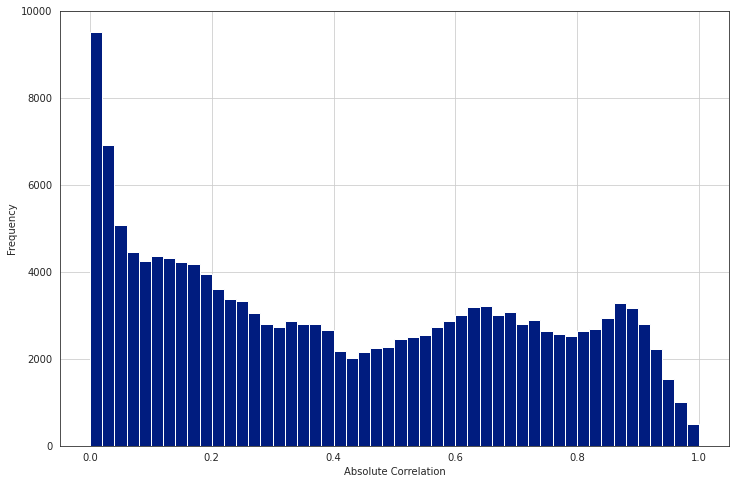

In [111]:

sns.set_style('white')
ax=corr_values.abscorrelation.hist(bins=50,figsize=(12,8))
ax.set(xlabel='Absolute Correlation',ylabel='Frequency')

So we run this and we see that most of the time there's essentially zero correlation and then we see much less at the top end that there's close to one in terms of correlation. But otherwise, maybe a couple of different modes here, but really fairly uniform across once it dips down from those lower values.

In [114]:
corr_values.sort_values('correlation',ascending=False).query('abscorrelation>0.8')

,feature1,feature2,correlation,abscorrelation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


So then we're going to say let's look at the most highly correlated values. We're going to sort the values by correlation with ascending equals false. So we're going to be going from top to bottom and then we just do .query. That's a way to filter down our database, similar to what we've done in brackets before we call .query. And then we can just pass in a column name. We only want the absolute correlation greater than 0.8. And we can look at those values and we see them all the way through the first 22,000 rows that we have for this 

In [116]:
corr_values.shape

(157080, 4)

if we look at the actual size actually let's go right here, the actual size of the original core values data frame.

This is going to be out of 157,000 different values because each one of the different cross-correlations, which is why we have so many possible values.